In [1]:
import joblib
import numpy as np
import glob
from importlib import reload
from PIL import Image
import msi_visual
from msi_visual import nmf_segmentation
reload(nmf_segmentation)

paths = glob.glob("D:\maldi\slides\slide2_notol_5_bin\\*.npy")

seg = nmf_segmentation.NMFSegmentation(k=15, normalization='tic', start_bin=0, end_bin=5005)
images = [np.load(p)[::2, ::2, :] for p in paths]
seg.fit(images)

joblib.dump(seg, "models/slide2_timson_15.joblib")

d:\miniconda3\envs\dl\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


['models/slide2_timson_15.joblib']

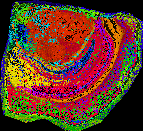

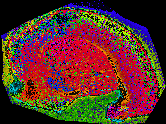

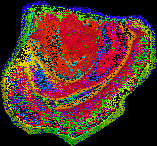

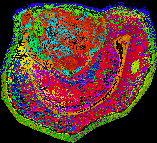

In [3]:
seg = joblib.load(open("models/slide2_timson_15.joblib", "rb"))
for img in seg.visualize_training_components(images):
    display(Image.fromarray(img))

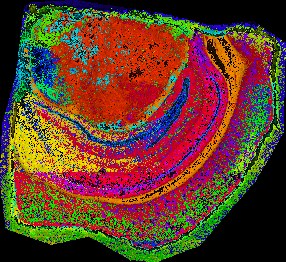

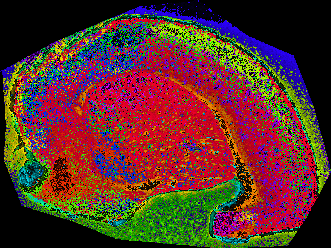

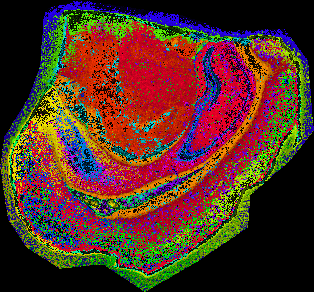

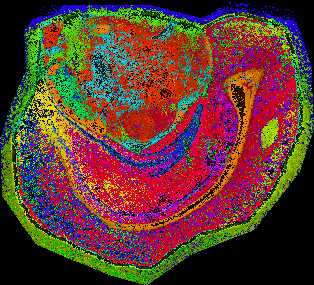

In [5]:
for path in paths:
    mask, viz = seg.predict(np.load(path))
    display(Image.fromarray(viz))